In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [104]:
x_11 = np.random.randint(11,15, 50)
x_12 = np.random.randint(40, 60, 50)
x_13 = np.random.randint(80,100, 50)

x_21 = np.random.randint(121,210, 50)
x_22 = np.random.randint(300,513, 50)
x_23 = np.random.randint(800,1204, 50)
x1 = np.concatenate ((x_11, x_12, x_13))
x2 = np.concatenate ((x_21, x_22, x_23))
x = {'x1': x1, 'x2': x2}


In [105]:
X = pd.DataFrame(data = x, columns=['x1', 'x2'])

In [106]:
X.head()

,x1,x2
0,14,206
1,13,202
2,12,147
3,14,194
4,12,173


Text(0, 0.5, 'ширина лепестка (cm)')

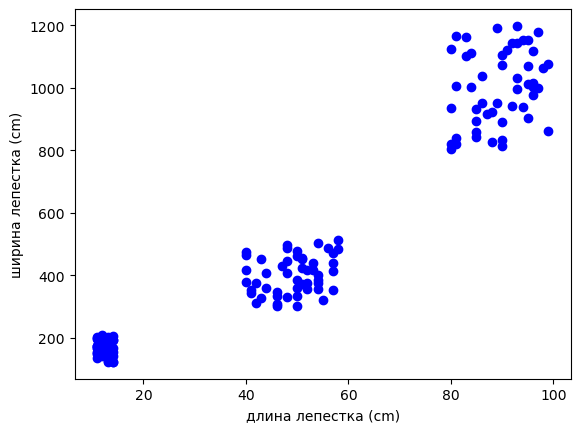

In [107]:
plt.scatter(X['x1'], X['x2'], color='blue')
plt.xlabel('длина лепестка (cm)')
plt.ylabel('ширина лепестка (cm)')

In [108]:
from sklearn.cluster import KMeans

G:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


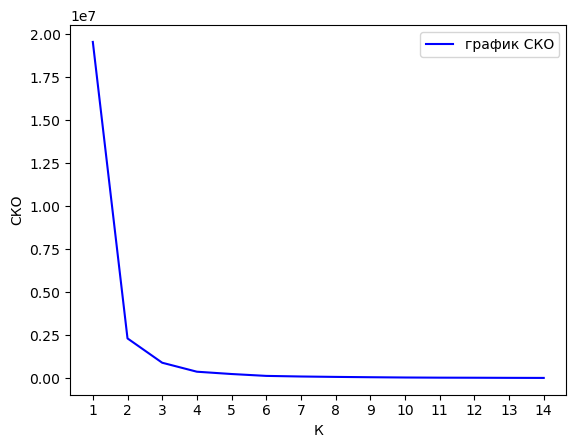

In [109]:
k_rng = range(1, 15)
sse = []
for i in k_rng:
    km = KMeans(n_clusters=i)
    km.fit_transform(X)
    sse.append(km.inertia_)
    
fig, ax = plt.subplots()
ax.plot(k_rng, sse, color='blue', label='график СКО')
ax.set_xticks(np.arange(1,15))
ax.set_xlabel('К')
ax.set_ylabel('СКО')
# ax.scatter(3, sse[2], color='black', label='K с лучшей СКО') #надо вместо 3 и sse[i] (вместо i) поставить 
# два других значения,в соответствии с данными
ax.legend()

In [110]:
X

,x1,x2
0,14,206
1,13,202
2,12,147
3,14,194
4,12,173
...,...,...
145,90,832
146,95,1070
147,99,1075
148,95,1152


In [111]:
km1 = KMeans(n_clusters=3)
y_predicted = km1.fit_predict(X)
X['cluster'] = y_predicted 
X.head()
# y_predicted

,x1,x2,cluster
0,14,206,2
1,13,202,2
2,12,147,2
3,14,194,2
4,12,173,2


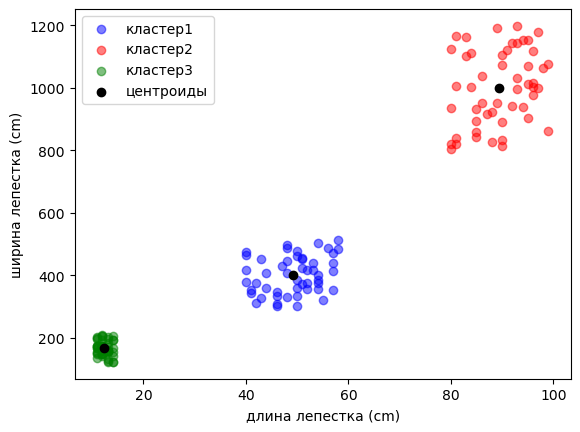

In [112]:
df1=X[X.cluster==0]
df2=X[X.cluster==1]
df3=X[X.cluster==2]
fig, ax = plt.subplots()
ax.scatter(df1['x1'], df1['x2'], alpha=0.5, color='blue', label='кластер1')
ax.scatter(df2['x1'], df2['x2'], alpha=0.5, color='red', label='кластер2')
ax.scatter(df3['x1'], df3['x2'], alpha=0.5, color='green', label='кластер3')
ax.scatter(km1.cluster_centers_[:, 0], km1.cluster_centers_[:, 1], color='black', label='центроиды')
ax.set_xlabel('длина лепестка (cm)')
ax.set_ylabel('ширина лепестка (cm)')
ax.legend()
plt.show()

In [113]:
y_predicted

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [114]:
X['cluster'] = X['cluster'].map({0: 'кластер1', 1: 'кластер2', 2: 'кластер3'})
